[Guide](https://www.kaggle.com/darpan25bajaj/air-passengers-forecasting)

In [76]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

Print top 5 rows

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Create function **plot_timeseries(df)**

In [7]:
def plot_timeseries(df):
    df.plot()
    plt.show()

Plot the timeseries from above

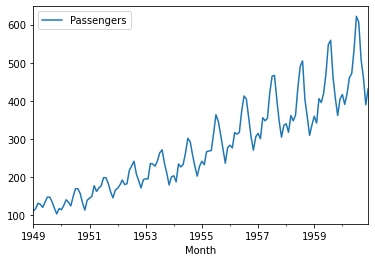

In [8]:
plot_timeseries(df)

Compute a rolling mean and a rolling std with an appropriate window size

In [44]:
rolling = df.rolling(window=12)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

Plot two timeseries:
- with rolling mean 
- with rolling std

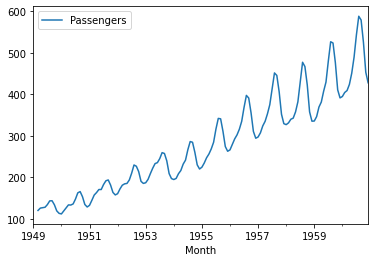

In [11]:
plot_timeseries(rolling_mean)

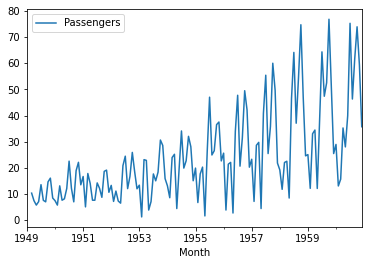

In [12]:
plot_timeseries(rolling_std)

Test the stationarity of all timeseries

In [16]:
result = adfuller(df)

for d in [df, rolling_mean, rolling_std]:
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Transform the original timeseries with logarithm

In [19]:
# transform 1: log
log_df = np.log(df)

Plot transformed timeseries

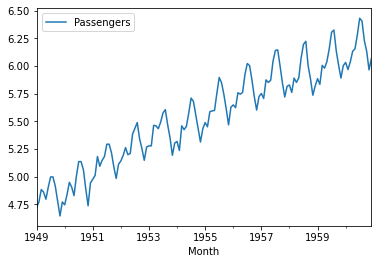

In [20]:
plot_timeseries(log_df)

Test the stationarity of transformed timeseries. If it isn't stationary, try different transformation techniques

In [21]:
result = adfuller(log_df)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [54]:
# transform 2: difference of log transform
diff_log_df = log_df.diff(2).dropna()
result = adfuller(diff_log_df)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.167907
p-value: 0.021919
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Use the stationary TS and find the optimal (p,d,q) params of ARIMA model

In [56]:
import itertools

# define the p, d, q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0, 1)

# generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

In [77]:
for param in pdq:
    temp_model = ARIMA(diff_log_df, order = param)
    results = temp_model.fit()

    best = np.inf

    if results.aic < best:
        best = results.aic
        best_pdq = param
        
print(f'Best ARIMA (p, d, q): {best_pdq}, score: {best}')

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

Best ARIMA (p, d, q): (2, 0, 2), score: -260.79936067562846


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
diff_log_df.tail(15)

,Passengers
Month,
1959-10-01,-0.317336
1959-11-01,-0.246083
1959-12-01,-0.004926
1960-01-01,0.141442
1960-02-01,-0.035180
1960-03-01,0.004785
1960-04-01,0.164690
1960-05-01,0.119108
1960-06-01,0.148869


Plot the predictions (not transformed to the original scale)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


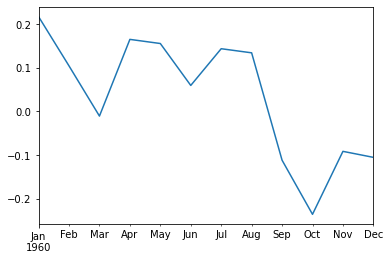

In [97]:
model = ARIMA(diff_log_df, order=(2,0,2))
results = model.fit()

pred = results.get_prediction(start=pd.to_datetime('1960-01-01'))
plot_timeseries(pred.predicted_mean)

Plot the predictions (transformed to the original scale)

Plot the predictions for the next 10 years